In [2]:
import torch 
if(torch.cuda.is_available()):
    print("GPU available")
    print(torch.cuda.get_device_name(0))

GPU available
NVIDIA GeForce RTX 4050 Laptop GPU


In [1]:
##dataset cleaning and importing

In [5]:
import os
import pandas as pd
import chardet  # Auto-detect encoding

# Input and output folder paths
input_folder = r"C:\Users\karkk\Downloads\imdb"
output_folder = r"C:\Users\karkk\Downloads\imdb_utf8_fixed"

# Ensure output directory exists
os.makedirs(output_folder, exist_ok=True)

# Function to detect file encoding
def detect_encoding(file_path):
    with open(file_path, "rb") as f:
        result = chardet.detect(f.read(100000))  # Read first 100KB for detection
    return result["encoding"]

# Loop through all CSV files in the input folder
for file in os.listdir(input_folder):
    if file.endswith(".csv"):
        input_file = os.path.join(input_folder, file)
        output_file = os.path.join(output_folder, file)

        try:
            # Detect encoding
            detected_encoding = detect_encoding(input_file)
            print(f"🔍 Detected encoding for {file}: {detected_encoding}")

            # Read CSV with detected encoding
            df = pd.read_csv(input_file, encoding=detected_encoding, on_bad_lines="skip", dtype=str)

            # Save the fixed CSV as UTF-8
            df.to_csv(output_file, index=False, encoding="utf-8")

            print(f"✅ Successfully converted: {file}")

        except Exception as e:
            print(f"❌ Error processing {file}: {e}")

print("\n✅ All CSV files have been successfully converted to UTF-8.")

🔍 Detected encoding for aka_name.csv: utf-8
✅ Successfully converted: aka_name.csv
🔍 Detected encoding for aka_title.csv: utf-8
✅ Successfully converted: aka_title.csv
🔍 Detected encoding for cast_info.csv: utf-8
✅ Successfully converted: cast_info.csv
🔍 Detected encoding for char_name.csv: utf-8
✅ Successfully converted: char_name.csv
🔍 Detected encoding for company_name.csv: utf-8
✅ Successfully converted: company_name.csv
🔍 Detected encoding for company_type.csv: ascii
✅ Successfully converted: company_type.csv
🔍 Detected encoding for complete_cast.csv: ascii
✅ Successfully converted: complete_cast.csv
🔍 Detected encoding for comp_cast_type.csv: ascii
✅ Successfully converted: comp_cast_type.csv
🔍 Detected encoding for info_type.csv: ascii
✅ Successfully converted: info_type.csv
🔍 Detected encoding for keyword.csv: utf-8
✅ Successfully converted: keyword.csv
🔍 Detected encoding for kind_type.csv: ascii
✅ Successfully converted: kind_type.csv
🔍 Detected encoding for link_type.csv: as

In [9]:
import chardet

file_path = "C:/Users/karkk/Downloads/imdb/movie_info.csv"

# Detect encoding
with open(file_path, "rb") as f:
    result = chardet.detect(f.read(100000))  # Read first 100,000 bytes
    print(f"Detected encoding: {result['encoding']}")


Detected encoding: ascii


In [11]:
import pandas as pd

input_file = "C:/Users/karkk/Downloads/imdb/movie_info.csv"
output_file = "C:/Users/karkk/Downloads/imdb_utf8_fixed/movie_info.csv"

try:
    # Read with ISO-8859-1 to handle special characters
    df = pd.read_csv(input_file, encoding="ISO-8859-1", on_bad_lines="skip")
    
    # Save as UTF-8
    df.to_csv(output_file, index=False, encoding="utf-8")
    
    print("✅ Successfully converted movie_info.csv to UTF-8.")
except Exception as e:
    print(f"❌ Error: {e}")


C:\Users\karkk\AppData\Local\Temp\ipykernel_19212\2520184233.py:8: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file, encoding="ISO-8859-1", on_bad_lines="skip")


✅ Successfully converted movie_info.csv to UTF-8.


In [15]:
import pandas as pd

input_file = "C:/Users/karkk/Downloads/imdb_utf8_fixed/movie_info.csv"

# Load CSV and print column names
df = pd.read_csv(input_file, encoding="utf-8", low_memory=False)
print(df.columns)  # Show actual column names


Index(['7266123', '921521', '4', 'English', 'Unnamed: 4'], dtype='object')


In [17]:
import pandas as pd

input_file = "C:/Users/karkk/Downloads/imdb_utf8_fixed/movie_info.csv"
output_file = "C:/Users/karkk/Downloads/imdb_utf8_fixed/movie_info_fixed.csv"

# Define correct column names manually
column_names = ['id', 'movie_id', 'info_type_id', 'info', 'note']  # Adjust based on your dataset

# Read CSV without treating the first row as headers
df = pd.read_csv(input_file, encoding="utf-8", low_memory=False, header=None, names=column_names)

# Fill NULL values in 'info' column with 'UNKNOWN'
df['info'].fillna('UNKNOWN', inplace=True)

# Save the fixed CSV
df.to_csv(output_file, index=False, encoding="utf-8")

print("✅ Fixed CSV saved successfully.")


C:\Users\karkk\AppData\Local\Temp\ipykernel_19212\2012399456.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['info'].fillna('UNKNOWN', inplace=True)


✅ Fixed CSV saved successfully.


In [19]:
df = pd.read_csv(input_file, encoding="utf-8", low_memory=False)
print(df.head(10))  # See the first 10 rows


        id  movie_id  info_type_id     info        note
0  7266123    921521             4  English  Unnamed: 4
1  7266124    921522             4  English         NaN
2  7266125    921523             4  English         NaN
3  7266126    921524             4  English         NaN
4  7266127    921525             4  English         NaN
5  7266128    921526             4  English         NaN
6  7266129    921527             4  English         NaN
7  7266130    921528             4  English         NaN
8  7266131    921529             4  English         NaN
9  7266132    921530             4  English         NaN


In [21]:
import pandas as pd

input_file = "C:/Users/karkk/Downloads/imdb_utf8_fixed/movie_info.csv"
output_file = "C:/Users/karkk/Downloads/imdb_utf8_fixed/movie_info_fixed.csv"

# Define correct column names
column_names = ['id', 'movie_id', 'info_type_id', 'info', 'note']

# Read CSV and drop extra columns
df = pd.read_csv(input_file, encoding="utf-8", low_memory=False, names=column_names, header=0)

# Drop the unnecessary "note" column
df.drop(columns=['note'], inplace=True)

# Fill NULL values in 'info' column with 'UNKNOWN'
df['info'].fillna('UNKNOWN', inplace=True)

# Save the fixed CSV
df.to_csv(output_file, index=False, encoding="utf-8")

print("✅ Fixed CSV saved successfully.")


C:\Users\karkk\AppData\Local\Temp\ipykernel_19212\2787520780.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['info'].fillna('UNKNOWN', inplace=True)


✅ Fixed CSV saved successfully.


In [25]:
import pandas as pd

input_file = "C:/Users/karkk/Downloads/imdb_utf8_fixed/movie_info.csv"
output_file = "C:/Users/karkk/Downloads/imdb_utf8_fixed/movie_info_fixed.csv"

# Define correct column names
column_names = ['id', 'movie_id', 'info_type_id', 'info', 'note']

# Read CSV and ensure the correct number of columns
df = pd.read_csv(input_file, encoding="utf-8", names=column_names, header=0, low_memory=False)

# Fill NULL values in 'info' and 'note' columns
df['info'].fillna('UNKNOWN', inplace=True)
df['note'].fillna('UNKNOWN', inplace=True)

# Save the fixed CSV
df.to_csv(output_file, index=False, encoding="utf-8")

print("✅ Fixed CSV saved successfully.")


C:\Users\karkk\AppData\Local\Temp\ipykernel_19212\860150085.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['info'].fillna('UNKNOWN', inplace=True)
C:\Users\karkk\AppData\Local\Temp\ipykernel_19212\860150085.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

✅ Fixed CSV saved successfully.


In [29]:
df = pd.read_csv(output_file, encoding="utf-8", low_memory=False)
print(df.head(10))  # See the first 10 rows

        id  movie_id  info_type_id     info        note
0  7266123    921521             4  English  Unnamed: 4
1  7266124    921522             4  English     UNKNOWN
2  7266125    921523             4  English     UNKNOWN
3  7266126    921524             4  English     UNKNOWN
4  7266127    921525             4  English     UNKNOWN
5  7266128    921526             4  English     UNKNOWN
6  7266129    921527             4  English     UNKNOWN
7  7266130    921528             4  English     UNKNOWN
8  7266131    921529             4  English     UNKNOWN
9  7266132    921530             4  English     UNKNOWN


In [35]:
import pandas as pd

input_file = "C:/Users/karkk/Downloads/imdb_utf8_fixed/movie_info.csv"
output_file = "C:/Users/karkk/Downloads/imdb_utf8_fixed/movie_info_fixed.csv"

# Read CSV correctly (skip first row as it is already a header)
df = pd.read_csv(input_file, encoding="utf-8", header=0, low_memory=False)

# Ensure column names match schema
df.columns = ['id', 'movie_id', 'info_type_id', 'info', 'note']

# Replace NaN with NULL (PostgreSQL expects NULL, not empty strings)
df = df.where(pd.notna(df), None)

# Save fixed CSV
df.to_csv(output_file, index=False, encoding="utf-8", na_rep='NULL')

print("✅ Fixed CSV saved successfully.")



✅ Fixed CSV saved successfully.


In [33]:
df = pd.read_csv(input_file, encoding="utf-8", header=None, low_memory=False)
print(f"CSV has {df.shape[1]} columns")
print(df.head(5))

CSV has 5 columns
         0         1             2        3           4
0       id  movie_id  info_type_id     info        note
1  7266123    921521             4  English  Unnamed: 4
2  7266124    921522             4  English         NaN
3  7266125    921523             4  English         NaN
4  7266126    921524             4  English         NaN


In [41]:
import pandas as pd

input_file = "C:/Users/karkk/Downloads/imdb_utf8_fixed/movie_info.csv"
output_file = "C:/Users/karkk/Downloads/imdb_utf8_fixed/movie_info_utf8.csv"

# Step 1: Open the file in binary mode and read it as bytes
with open(input_file, "rb") as f:
    raw_data = f.read()

# Step 2: Decode it by forcing UTF-8 conversion
decoded_data = raw_data.decode("utf-8", "replace")

# Step 3: Save the fixed data as a new UTF-8 file
with open(output_file, "w", encoding="utf-8") as f:
    f.write(decoded_data)

print("✅ File converted to UTF-8 successfully.")




✅ File converted to UTF-8 successfully.


In [43]:
import pandas as pd

input_file = "C:/Users/karkk/Downloads/imdb_utf8_fixed/movie_info.csv"
output_file = "C:/Users/karkk/Downloads/imdb_utf8_fixed/movie_info_cleaned.csv"

# Read CSV and enforce correct data types
df = pd.read_csv(input_file, encoding="utf-8", low_memory=False)

# Drop rows where 'id', 'movie_id', or 'info_type_id' are missing
df = df.dropna(subset=['id', 'movie_id', 'info_type_id'])

# Convert numeric columns to integers (to avoid empty string issues)
df['id'] = df['id'].astype(int)
df['movie_id'] = df['movie_id'].astype(int)
df['info_type_id'] = df['info_type_id'].astype(int)

# Replace NULLs in 'info' and 'note' with 'UNKNOWN'
df['info'] = df['info'].fillna('UNKNOWN')
df['note'] = df['note'].fillna('UNKNOWN')

# Save the cleaned data
df.to_csv(output_file, index=False, encoding="utf-8", na_rep='NULL')

print("✅ File cleaned and saved successfully.")


✅ File cleaned and saved successfully.


In [45]:
import psycopg2
import pandas as pd

# Database Connection
conn = psycopg2.connect(
    dbname="imdb_job",
    user="postgres",
    password="Kark@1234",
    host="localhost",
    port="5432"
)
cur = conn.cursor()

# Path to CSV
input_file = "C:/Users/karkk/Downloads/imdb_utf8_fixed/movie_info.csv"

# Load CSV (fix encoding issues)
df = pd.read_csv(input_file, encoding="latin1", low_memory=False, dtype=str)

# Replace problematic characters
df = df.applymap(lambda x: x.encode('utf-8', 'ignore').decode('utf-8') if isinstance(x, str) else x)

# Save cleaned CSV (temp file)
cleaned_file = "C:/Users/karkk/Downloads/imdb_utf8_fixed/movie_info_cleaned.csv"
df.to_csv(cleaned_file, index=False, encoding="utf-8", na_rep='NULL')

# Import CSV via COPY
with open(cleaned_file, 'r', encoding="utf-8") as f:
    next(f)  # Skip header
    cur.copy_expert("COPY movie_info FROM STDIN WITH CSV NULL 'NULL'", f)

# Commit & Close
conn.commit()
cur.close()
conn.close()

print("✅ Data imported successfully!")


C:\Users\karkk\AppData\Local\Temp\ipykernel_19212\237791323.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode('utf-8', 'ignore').decode('utf-8') if isinstance(x, str) else x)


✅ Data imported successfully!


In [47]:
!pip install psycopg2 pandas tqdm

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.2 MB ? eta -:--:--
   ------------------ --------------------- 0.5/1.2 MB 1.0 MB/s eta 0:00:01
   ------------------ --------------------- 0.5/1.2 MB 1.0 MB/s eta 0:00:01
   --------------------------- ------------ 0.8/1.2 MB 931.2 kB/s eta 0:00:01
   --------------------------- ------------ 0.8/1.2 MB 931.2 kB/s eta 0:00:01
   --------------------------- ------------ 0.8/1.2 MB 931.2 kB/s eta 0:00:01
   --------------------------- ------------ 0.8/1.2 MB 931.2 kB/s eta 0:00:01
   ------------------------------------ --- 1.0/1.2 MB 541.2 kB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 510.6 kB/s eta 0:00:00


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\karkk\\anaconda3\\Lib\\site-packages\\psycopg2\\_psycopg.cp312-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [49]:
!pip install psycopg2 pandas tqdm

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\karkk\\anaconda3\\Lib\\site-packages\\psycopg2\\_psycopg.cp312-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Using cached psycopg2-2.9.10-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
Using cached psycopg2-2.9.10-cp312-cp312-win_amd64.whl (1.2 MB)


In [2]:
import os
import pandas as pd
import psycopg2
from tqdm import tqdm

# Database connection settings
DB_NAME = "imdb_job"
DB_USER = "postgres"
DB_PASSWORD = "Kark@1234"
DB_HOST = "localhost"
DB_PORT = "5432"

# Path to CSV files
CSV_FOLDER = "C:/Users/karkk/Downloads/imdb_utf8_fixed/"

# IMDb table names
TABLES = [
    "aka_name", "aka_title", "cast_info", "char_name", "comp_cast_type",
    "company_name", "company_type", "complete_cast", "info_type", "keyword",
    "kind_type", "link_type", "movie_companies", "movie_info_idx",
    "movie_keyword", "movie_link", "name", "role_type", "title",
    "movie_info", "person_info"
]

# Connect to PostgreSQL
conn = psycopg2.connect(
    dbname=DB_NAME, user=DB_USER, password=DB_PASSWORD, host=DB_HOST, port=DB_PORT
)
cur = conn.cursor()

# Import each table
for table in tqdm(TABLES, desc="Importing Tables", unit="table"):
    csv_file = os.path.join(CSV_FOLDER, f"{table}.csv")

    if not os.path.exists(csv_file):
        print(f"⚠️ Skipping {table}.csv (File Not Found!)")
        continue

    print(f"📥 Importing {table}...")

    try:
        # Fix encoding issues and save a cleaned UTF-8 version
        df = pd.read_csv(csv_file, encoding="windows-1252", low_memory=False)
        utf8_file = os.path.join(CSV_FOLDER, f"{table}_utf8.csv")
        df.to_csv(utf8_file, index=False, encoding="utf-8", na_rep='NULL')

        # Load into PostgreSQL using COPY
        with open(utf8_file, "r", encoding="utf-8") as f:
            cur.copy_expert(f"COPY {table} FROM STDIN WITH CSV HEADER NULL 'NULL'", f)

        conn.commit()
        print(f"✅ Successfully imported {table}!")

    except Exception as e:
        conn.rollback()
        print(f"❌ Error importing {table}: {e}")

# Close connection
cur.close()
conn.close()
print("🎉 All tables imported successfully!")


Importing Tables:   0%|                                                                      | 0/21 [00:00<?, ?table/s]

📥 Importing aka_name...
❌ Error importing aka_name: 'charmap' codec can't decode byte 0x81 in position 5611: character maps to <undefined>
📥 Importing aka_title...
❌ Error importing aka_title: 'charmap' codec can't decode byte 0x90 in position 6844: character maps to <undefined>
📥 Importing cast_info...
❌ Error importing cast_info: 'charmap' codec can't decode byte 0x81 in position 211973: character maps to <undefined>
📥 Importing char_name...
❌ Error importing char_name: 'charmap' codec can't decode byte 0x81 in position 6504: character maps to <undefined>
📥 Importing comp_cast_type...
✅ Successfully imported comp_cast_type!
📥 Importing company_name...
❌ Error importing company_name: 'charmap' codec can't decode byte 0x8d in position 15616: character maps to <undefined>
📥 Importing company_type...
✅ Successfully imported company_type!
📥 Importing complete_cast...


Importing Tables:  38%|███████████████████████▌                                      | 8/21 [00:00<00:00, 14.77table/s]

✅ Successfully imported complete_cast!
📥 Importing info_type...
✅ Successfully imported info_type!
📥 Importing keyword...
❌ Error importing keyword: 'charmap' codec can't decode byte 0x8d in position 57602: character maps to <undefined>
📥 Importing kind_type...
✅ Successfully imported kind_type!
📥 Importing link_type...
✅ Successfully imported link_type!
📥 Importing movie_companies...


Importing Tables:  62%|█████████████████████████████████████▊                       | 13/21 [00:01<00:00,  9.04table/s]

❌ Error importing movie_companies: 'charmap' codec can't decode byte 0x81 in position 137095: character maps to <undefined>
📥 Importing movie_info_idx...


Importing Tables:  67%|████████████████████████████████████████▋                    | 14/21 [00:09<00:07,  1.03s/table]

✅ Successfully imported movie_info_idx!
📥 Importing movie_keyword...


Importing Tables:  71%|███████████████████████████████████████████▌                 | 15/21 [00:30<00:23,  3.99s/table]

✅ Successfully imported movie_keyword!
📥 Importing movie_link...


Importing Tables:  76%|██████████████████████████████████████████████▍              | 16/21 [00:30<00:16,  3.35s/table]

✅ Successfully imported movie_link!
📥 Importing name...
❌ Error importing name: 'charmap' codec can't decode byte 0x81 in position 25794: character maps to <undefined>
📥 Importing role_type...
✅ Successfully imported role_type!
📥 Importing title...
❌ Error importing title: 'charmap' codec can't decode byte 0x81 in position 8255: character maps to <undefined>
📥 Importing movie_info...


Importing Tables: 100%|█████████████████████████████████████████████████████████████| 21/21 [00:31<00:00,  1.49s/table]

❌ Error importing movie_info: 'charmap' codec can't decode byte 0x81 in position 138116: character maps to <undefined>
📥 Importing person_info...
❌ Error importing person_info: 'charmap' codec can't decode byte 0x81 in position 77240: character maps to <undefined>
🎉 All tables imported successfully!


In [4]:
import os
import pandas as pd

# Set your directory path
csv_directory = "C:/Users/karkk/Downloads/imdb_utf8_fixed/"

# Process all CSV files in the directory
for filename in os.listdir(csv_directory):
    if filename.endswith(".csv"):
        input_path = os.path.join(csv_directory, filename)
        output_path = os.path.join(csv_directory, "utf8_" + filename)

        print(f"🔄 Converting {filename} to UTF-8...")

        try:
            # Read with proper encoding handling
            df = pd.read_csv(input_path, encoding="ISO-8859-1", low_memory=False)
            
            # Replace problematic characters
            df = df.applymap(lambda x: x.encode("utf-8", "ignore").decode("utf-8") if isinstance(x, str) else x)
            
            # Save as UTF-8
            df.to_csv(output_path, index=False, encoding="utf-8")

            print(f"✅ Successfully converted: {output_path}")

        except Exception as e:
            print(f"❌ Error converting {filename}: {e}")

print("🎉 Encoding Fix Completed!")


🔄 Converting aka_name.csv to UTF-8...


C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\3658175357.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode("utf-8", "ignore").decode("utf-8") if isinstance(x, str) else x)


✅ Successfully converted: C:/Users/karkk/Downloads/imdb_utf8_fixed/utf8_aka_name.csv
🔄 Converting aka_title.csv to UTF-8...


C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\3658175357.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode("utf-8", "ignore").decode("utf-8") if isinstance(x, str) else x)


✅ Successfully converted: C:/Users/karkk/Downloads/imdb_utf8_fixed/utf8_aka_title.csv
🔄 Converting cast_info.csv to UTF-8...


C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\3658175357.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode("utf-8", "ignore").decode("utf-8") if isinstance(x, str) else x)


✅ Successfully converted: C:/Users/karkk/Downloads/imdb_utf8_fixed/utf8_cast_info.csv
🔄 Converting char_name.csv to UTF-8...


C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\3658175357.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode("utf-8", "ignore").decode("utf-8") if isinstance(x, str) else x)


✅ Successfully converted: C:/Users/karkk/Downloads/imdb_utf8_fixed/utf8_char_name.csv
🔄 Converting company_name.csv to UTF-8...


C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\3658175357.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode("utf-8", "ignore").decode("utf-8") if isinstance(x, str) else x)


✅ Successfully converted: C:/Users/karkk/Downloads/imdb_utf8_fixed/utf8_company_name.csv
🔄 Converting company_type.csv to UTF-8...
✅ Successfully converted: C:/Users/karkk/Downloads/imdb_utf8_fixed/utf8_company_type.csv
🔄 Converting company_type_utf8.csv to UTF-8...
✅ Successfully converted: C:/Users/karkk/Downloads/imdb_utf8_fixed/utf8_company_type_utf8.csv
🔄 Converting complete_cast.csv to UTF-8...


C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\3658175357.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode("utf-8", "ignore").decode("utf-8") if isinstance(x, str) else x)
C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\3658175357.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode("utf-8", "ignore").decode("utf-8") if isinstance(x, str) else x)
C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\3658175357.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode("utf-8", "ignore").decode("utf-8") if isinstance(x, str) else x)


✅ Successfully converted: C:/Users/karkk/Downloads/imdb_utf8_fixed/utf8_complete_cast.csv
🔄 Converting complete_cast_utf8.csv to UTF-8...


C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\3658175357.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode("utf-8", "ignore").decode("utf-8") if isinstance(x, str) else x)


✅ Successfully converted: C:/Users/karkk/Downloads/imdb_utf8_fixed/utf8_complete_cast_utf8.csv
🔄 Converting comp_cast_type.csv to UTF-8...
✅ Successfully converted: C:/Users/karkk/Downloads/imdb_utf8_fixed/utf8_comp_cast_type.csv
🔄 Converting comp_cast_type_utf8.csv to UTF-8...
✅ Successfully converted: C:/Users/karkk/Downloads/imdb_utf8_fixed/utf8_comp_cast_type_utf8.csv
🔄 Converting info_type.csv to UTF-8...
✅ Successfully converted: C:/Users/karkk/Downloads/imdb_utf8_fixed/utf8_info_type.csv
🔄 Converting info_type_utf8.csv to UTF-8...
✅ Successfully converted: C:/Users/karkk/Downloads/imdb_utf8_fixed/utf8_info_type_utf8.csv
🔄 Converting keyword.csv to UTF-8...


C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\3658175357.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode("utf-8", "ignore").decode("utf-8") if isinstance(x, str) else x)
C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\3658175357.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode("utf-8", "ignore").decode("utf-8") if isinstance(x, str) else x)
C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\3658175357.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode("utf-8", "ignore").decode("utf-8") if isinstance(x, str) else x)
C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\3658175357.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode("utf-8", "ignore").decode("utf-8") if isinstance(x, s

✅ Successfully converted: C:/Users/karkk/Downloads/imdb_utf8_fixed/utf8_keyword.csv
🔄 Converting kind_type.csv to UTF-8...
✅ Successfully converted: C:/Users/karkk/Downloads/imdb_utf8_fixed/utf8_kind_type.csv
🔄 Converting kind_type_utf8.csv to UTF-8...
✅ Successfully converted: C:/Users/karkk/Downloads/imdb_utf8_fixed/utf8_kind_type_utf8.csv
🔄 Converting link_type.csv to UTF-8...
✅ Successfully converted: C:/Users/karkk/Downloads/imdb_utf8_fixed/utf8_link_type.csv
🔄 Converting link_type_utf8.csv to UTF-8...
✅ Successfully converted: C:/Users/karkk/Downloads/imdb_utf8_fixed/utf8_link_type_utf8.csv
🔄 Converting movie_companies.csv to UTF-8...


C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\3658175357.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode("utf-8", "ignore").decode("utf-8") if isinstance(x, str) else x)
C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\3658175357.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode("utf-8", "ignore").decode("utf-8") if isinstance(x, str) else x)
C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\3658175357.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode("utf-8", "ignore").decode("utf-8") if isinstance(x, str) else x)
C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\3658175357.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode("utf-8", "ignore").decode("utf-8") if isinstance(x, s

✅ Successfully converted: C:/Users/karkk/Downloads/imdb_utf8_fixed/utf8_movie_companies.csv
🔄 Converting movie_info.csv to UTF-8...


C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\3658175357.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode("utf-8", "ignore").decode("utf-8") if isinstance(x, str) else x)


✅ Successfully converted: C:/Users/karkk/Downloads/imdb_utf8_fixed/utf8_movie_info.csv
🔄 Converting movie_info_cleaned.csv to UTF-8...


C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\3658175357.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode("utf-8", "ignore").decode("utf-8") if isinstance(x, str) else x)


✅ Successfully converted: C:/Users/karkk/Downloads/imdb_utf8_fixed/utf8_movie_info_cleaned.csv
🔄 Converting movie_info_idx.csv to UTF-8...


C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\3658175357.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode("utf-8", "ignore").decode("utf-8") if isinstance(x, str) else x)


✅ Successfully converted: C:/Users/karkk/Downloads/imdb_utf8_fixed/utf8_movie_info_idx.csv
🔄 Converting movie_info_idx_utf8.csv to UTF-8...


C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\3658175357.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode("utf-8", "ignore").decode("utf-8") if isinstance(x, str) else x)


✅ Successfully converted: C:/Users/karkk/Downloads/imdb_utf8_fixed/utf8_movie_info_idx_utf8.csv
🔄 Converting movie_keyword.csv to UTF-8...


C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\3658175357.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode("utf-8", "ignore").decode("utf-8") if isinstance(x, str) else x)


✅ Successfully converted: C:/Users/karkk/Downloads/imdb_utf8_fixed/utf8_movie_keyword.csv
🔄 Converting movie_keyword_utf8.csv to UTF-8...


C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\3658175357.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode("utf-8", "ignore").decode("utf-8") if isinstance(x, str) else x)


✅ Successfully converted: C:/Users/karkk/Downloads/imdb_utf8_fixed/utf8_movie_keyword_utf8.csv
🔄 Converting movie_link.csv to UTF-8...
✅ Successfully converted: C:/Users/karkk/Downloads/imdb_utf8_fixed/utf8_movie_link.csv
🔄 Converting movie_link_utf8.csv to UTF-8...
✅ Successfully converted: C:/Users/karkk/Downloads/imdb_utf8_fixed/utf8_movie_link_utf8.csv
🔄 Converting name.csv to UTF-8...


C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\3658175357.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode("utf-8", "ignore").decode("utf-8") if isinstance(x, str) else x)
C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\3658175357.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode("utf-8", "ignore").decode("utf-8") if isinstance(x, str) else x)
C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\3658175357.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode("utf-8", "ignore").decode("utf-8") if isinstance(x, str) else x)


✅ Successfully converted: C:/Users/karkk/Downloads/imdb_utf8_fixed/utf8_name.csv
🔄 Converting person_info.csv to UTF-8...


C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\3658175357.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode("utf-8", "ignore").decode("utf-8") if isinstance(x, str) else x)


✅ Successfully converted: C:/Users/karkk/Downloads/imdb_utf8_fixed/utf8_person_info.csv
🔄 Converting role_type.csv to UTF-8...


C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\3658175357.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode("utf-8", "ignore").decode("utf-8") if isinstance(x, str) else x)
C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\3658175357.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode("utf-8", "ignore").decode("utf-8") if isinstance(x, str) else x)


✅ Successfully converted: C:/Users/karkk/Downloads/imdb_utf8_fixed/utf8_role_type.csv
🔄 Converting role_type_utf8.csv to UTF-8...
✅ Successfully converted: C:/Users/karkk/Downloads/imdb_utf8_fixed/utf8_role_type_utf8.csv
🔄 Converting title.csv to UTF-8...


C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\3658175357.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode("utf-8", "ignore").decode("utf-8") if isinstance(x, str) else x)


✅ Successfully converted: C:/Users/karkk/Downloads/imdb_utf8_fixed/utf8_title.csv
🎉 Encoding Fix Completed!


In [6]:
import os
import psycopg2
from tqdm import tqdm

# Database connection settings
DB_NAME = "imdb_job"
DB_USER = "postgres"
DB_PASSWORD = "Kark@1234"
DB_HOST = "localhost"
DB_PORT = "5432"

# Path to CSV files
CSV_FOLDER = "C:/Users/karkk/Downloads/imdb_utf8_fixed/"

# Tables that failed previously
FAILED_TABLES = [
    "aka_name", "aka_title", "cast_info", "char_name", "company_name",
    "keyword", "movie_companies", "name", "title", "person_info"
]

# Connect to PostgreSQL
conn = psycopg2.connect(
    dbname=DB_NAME, user=DB_USER, password=DB_PASSWORD, host=DB_HOST, port=DB_PORT
)
cur = conn.cursor()

# Import remaining tables
for table in tqdm(FAILED_TABLES, desc="Importing Remaining Tables", unit="table"):
    csv_file = os.path.join(CSV_FOLDER, f"{table}.csv")

    if not os.path.exists(csv_file):
        print(f"⚠️ Skipping {table}.csv (File Not Found!)")
        continue

    print(f"📥 Importing {table}...")

    try:
        # Load into PostgreSQL using COPY
        with open(csv_file, "r", encoding="utf-8") as f:
            cur.copy_expert(f"COPY {table} FROM STDIN WITH CSV HEADER NULL 'NULL'", f)

        conn.commit()
        print(f"✅ Successfully imported {table}!")

    except Exception as e:
        conn.rollback()
        print(f"❌ Error importing {table}: {e}")

# Close connection
cur.close()
conn.close()
print("🎉 Remaining tables imported successfully!")


Importing Remaining Tables:   0%|                                                            | 0/10 [00:00<?, ?table/s]

📥 Importing aka_name...


Importing Remaining Tables:  10%|█████▏                                              | 1/10 [00:01<00:16,  1.85s/table]

✅ Successfully imported aka_name!
📥 Importing aka_title...


Importing Remaining Tables:  20%|██████████▍                                         | 2/10 [00:02<00:07,  1.13table/s]

❌ Error importing aka_title: invalid input syntax for type integer: "1985.0"
CONTEXT:  COPY aka_title, line 2, column production_year: "1985.0"

📥 Importing cast_info...


Importing Remaining Tables:  30%|███████████████▌                                    | 3/10 [00:08<00:24,  3.43s/table]

❌ Error importing cast_info: invalid input syntax for type integer: "1.0"
CONTEXT:  COPY cast_info, line 2, column person_role_id: "1.0"

📥 Importing char_name...


Importing Remaining Tables:  50%|██████████████████████████                          | 5/10 [00:09<00:08,  1.71s/table]

❌ Error importing char_name: invalid input syntax for type integer: ""
CONTEXT:  COPY char_name, line 2, column imdb_id: ""

📥 Importing company_name...
❌ Error importing company_name: invalid input syntax for type integer: ""
CONTEXT:  COPY company_name, line 2, column imdb_id: ""

📥 Importing keyword...


Importing Remaining Tables:  60%|███████████████████████████████▏                    | 6/10 [00:10<00:05,  1.33s/table]

✅ Successfully imported keyword!
📥 Importing movie_companies...


Importing Remaining Tables:  70%|████████████████████████████████████▍               | 7/10 [00:20<00:12,  4.28s/table]

✅ Successfully imported movie_companies!
📥 Importing name...


Importing Remaining Tables:  80%|█████████████████████████████████████████▌          | 8/10 [00:22<00:06,  3.49s/table]

❌ Error importing name: invalid input syntax for type integer: ""
CONTEXT:  COPY name, line 2, column imdb_id: ""

📥 Importing title...


Importing Remaining Tables:  90%|██████████████████████████████████████████████▊     | 9/10 [00:23<00:02,  2.76s/table]

❌ Error importing title: invalid input syntax for type integer: "2010.0"
CONTEXT:  COPY title, line 2, column production_year: "2010.0"

📥 Importing person_info...


Importing Remaining Tables: 100%|███████████████████████████████████████████████████| 10/10 [00:25<00:00,  2.58s/table]

❌ Error importing person_info: extra data after last expected column
CONTEXT:  COPY person_info, line 2: "3,4147861,24,'Tene Clark' (17 November 2005 - present),,,,,,,,,,,,,,,,,,,"

🎉 Remaining tables imported successfully!


In [10]:
import pandas as pd
import os

CSV_FOLDER = "C:/Users/karkk/Downloads/imdb_utf8_fixed/"
FILES_TO_FIX = {
    "aka_title": ["id", "movie_id", "title", "imdb_index", "kind_id", "production_year",
                  "phonetic_code", "episode_of_id", "season_nr", "episode_nr", "note", "md5sum"],
    "cast_info": ["id", "person_id", "movie_id", "person_role_id", "note", "nr_ordered",
                  "role_id"],
    "title": ["id", "title", "imdb_index", "kind_id", "production_year", "phonetic_code",
              "episode_of_id", "season_nr", "episode_nr", "series_years", "md5sum"]
}

for table, columns in FILES_TO_FIX.items():
    csv_file = os.path.join(CSV_FOLDER, f"{table}.csv")
    
    if os.path.exists(csv_file):
        print(f"🔄 Fixing {table}...")
        
        # Read CSV without headers, assign correct column names
        df = pd.read_csv(csv_file, names=columns, encoding="utf-8")
        
        # Convert integer columns safely
        if "production_year" in df.columns:
            df["production_year"] = pd.to_numeric(df["production_year"], errors="coerce").fillna(0).astype(int)
        
        if "person_role_id" in df.columns:
            df["person_role_id"] = pd.to_numeric(df["person_role_id"], errors="coerce").fillna(0).astype(int)

        # Save cleaned file
        df.to_csv(csv_file, index=False, encoding="utf-8")
        print(f"✅ Fixed {table}!")


🔄 Fixing aka_title...


C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\4213078344.py:21: DtypeWarning: Columns (7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file, names=columns, encoding="utf-8")


✅ Fixed aka_title!
🔄 Fixing cast_info...


C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\4213078344.py:21: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file, names=columns, encoding="utf-8")


✅ Fixed cast_info!
🔄 Fixing title...


C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\4213078344.py:21: DtypeWarning: Columns (5,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file, names=columns, encoding="utf-8")


✅ Fixed title!


In [12]:
EMPTY_FIX_TABLES = ["char_name", "company_name", "name"]

for table in EMPTY_FIX_TABLES:
    csv_file = os.path.join(CSV_FOLDER, f"{table}.csv")

    if os.path.exists(csv_file):
        print(f"🔄 Fixing empty integers in {table}...")
        df = pd.read_csv(csv_file, encoding="utf-8")

        for col in df.columns:
            if df[col].dtype == "int64" or df[col].dtype == "float64":
                df[col] = df[col].fillna(0).astype(int)

        df.to_csv(csv_file, index=False, encoding="utf-8")
        print(f"✅ Fixed {table}!")


🔄 Fixing empty integers in char_name...


C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\1829572058.py:8: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file, encoding="utf-8")


✅ Fixed char_name!
🔄 Fixing empty integers in company_name...
✅ Fixed company_name!
🔄 Fixing empty integers in name...


C:\Users\karkk\AppData\Local\Temp\ipykernel_23136\1829572058.py:8: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file, encoding="utf-8")


✅ Fixed name!


In [14]:
table = "person_info"
csv_file = os.path.join(CSV_FOLDER, f"{table}.csv")

if os.path.exists(csv_file):
    print(f"🔄 Fixing extra columns in {table}...")
    df = pd.read_csv(csv_file, encoding="utf-8")
    
    # Drop any extra unnamed columns
    df = df.loc[:, ~df.columns.str.contains("^Unnamed")]
    
    # Save cleaned file
    df.to_csv(csv_file, index=False, encoding="utf-8")
    print(f"✅ Fixed {table}!")


🔄 Fixing extra columns in person_info...
✅ Fixed person_info!


In [16]:
import os
import psycopg2
from tqdm import tqdm

# Database connection settings
DB_NAME = "imdb_job"
DB_USER = "postgres"
DB_PASSWORD = "Kark@1234"
DB_HOST = "localhost"
DB_PORT = "5432"

# Path to CSV files
CSV_FOLDER = "C:/Users/karkk/Downloads/imdb_utf8_fixed/"

# Tables that failed previously
FAILED_TABLES = [
   "char_name",
    "company_name",
    "keyword",
    "movie_companies",
    "name",
    "person_info",
    "title"
]

# Connect to PostgreSQL
conn = psycopg2.connect(
    dbname=DB_NAME, user=DB_USER, password=DB_PASSWORD, host=DB_HOST, port=DB_PORT
)
cur = conn.cursor()

# Import remaining tables
for table in tqdm(FAILED_TABLES, desc="Importing Remaining Tables", unit="table"):
    csv_file = os.path.join(CSV_FOLDER, f"{table}.csv")

    if not os.path.exists(csv_file):
        print(f"⚠️ Skipping {table}.csv (File Not Found!)")
        continue

    print(f"📥 Importing {table}...")

    try:
        # Load into PostgreSQL using COPY
        with open(csv_file, "r", encoding="utf-8") as f:
            cur.copy_expert(f"COPY {table} FROM STDIN WITH CSV HEADER NULL 'NULL'", f)

        conn.commit()
        print(f"✅ Successfully imported {table}!")

    except Exception as e:
        conn.rollback()
        print(f"❌ Error importing {table}: {e}")

# Close connection
cur.close()
conn.close()
print("🎉 Remaining tables imported successfully!")

Importing Remaining Tables:   0%|                                                             | 0/7 [00:00<?, ?table/s]

📥 Importing char_name...


Importing Remaining Tables:  14%|███████▌                                             | 1/7 [00:14<01:29, 14.88s/table]

✅ Successfully imported char_name!
📥 Importing company_name...


Importing Remaining Tables:  29%|███████████████▏                                     | 2/7 [00:16<00:34,  6.92s/table]

✅ Successfully imported company_name!
📥 Importing keyword...
❌ Error importing keyword: duplicate key value violates unique constraint "keyword_pkey"
DETAIL:  Key (id)=(157) already exists.
CONTEXT:  COPY keyword, line 2

📥 Importing movie_companies...


Importing Remaining Tables:  57%|██████████████████████████████▎                      | 4/7 [00:16<00:08,  2.73s/table]

❌ Error importing movie_companies: duplicate key value violates unique constraint "movie_companies_pkey"
DETAIL:  Key (id)=(2) already exists.
CONTEXT:  COPY movie_companies, line 2

📥 Importing name...


Importing Remaining Tables:  71%|█████████████████████████████████████▊               | 5/7 [00:39<00:17,  8.78s/table]

✅ Successfully imported name!
📥 Importing person_info...


Importing Remaining Tables:  86%|█████████████████████████████████████████████▍       | 6/7 [00:43<00:07,  7.36s/table]

❌ Error importing person_info: extra data after last expected column
CONTEXT:  COPY person_info, line 2: "3,4147861,24,'Tene Clark' (17 November 2005 - present),,,,,,,,,,,,,,,,,,,"

📥 Importing title...


Importing Remaining Tables: 100%|█████████████████████████████████████████████████████| 7/7 [00:45<00:00,  6.44s/table]

❌ Error importing title: invalid input syntax for type integer: "(#1.66)"
CONTEXT:  COPY title, line 2, column id: "(#1.66)"

🎉 Remaining tables imported successfully!


In [1]:
import pandas as pd
import os

CSV_DIR = "C:/Users/karkk/Downloads/imdb_utf8_fixed/"

for table in ["keyword", "movie_companies"]:
    csv_file = os.path.join(CSV_DIR, f"{table}.csv")

    try:
        df = pd.read_csv(csv_file, header=None, encoding="utf-8", dtype=str)

        # Drop duplicate IDs
        df = df.drop_duplicates(subset=[0])  # Assuming ID is in the first column

        # Save cleaned CSV
        df.to_csv(csv_file, index=False, header=False, encoding="utf-8")
        print(f"✅ Fixed and saved: {table}")

    except Exception as e:
        print(f"❌ Error fixing {table}: {e}")


✅ Fixed and saved: keyword
✅ Fixed and saved: movie_companies


In [3]:
csv_file = os.path.join(CSV_DIR, "title.csv")

try:
    df = pd.read_csv(csv_file, header=None, encoding="utf-8", dtype=str)
    
    # Convert first column (ID) to integers, dropping invalid rows
    df = df[pd.to_numeric(df[0], errors='coerce').notna()]

    df.to_csv(csv_file, index=False, header=False, encoding="utf-8")
    print("✅ Fixed and saved: title")

except Exception as e:
    print(f"❌ Error fixing title: {e}")


✅ Fixed and saved: title


In [1]:
import os

CSV_DIR = "C:/Users/karkk/Downloads/imdb_utf8_fixed/"
files = ["aka_title.csv", "person_info.csv", "cast_info.csv"]

for file in files:
    path = os.path.join(CSV_DIR, file)
    if os.path.exists(path):
        print(f"\n🔍 Checking {file}:")
        with open(path, "r", encoding="utf-8") as f:
            for i in range(5):
                print(f.readline().strip())  # Print first 5 lines
    else:
        print(f"⚠️ File {file} not found!")



🔍 Checking aka_title.csv:
id,movie_id,title,imdb_index,kind_id,production_year,phonetic_code,episode_of_id,season_nr,episode_nr,note,md5sum
13117,833595,MalhaÃ§Ã£o - AdolescÃªncia: A Passagem da InfÃ¢ncia Para a Vida Adulta,Unnamed: 3,2,2011,M4342,Unnamed: 7,Unnamed: 8,Unnamed: 9,(Brazil) (nineteenth season title),320b4fa8ae74411e55cde509d9883e9c
6017,393076,Dirty Pair,,2,1985,D6316,,,,(USA),f77196370d0815fd72eb57ea2896c0e3
32738,1662042,Aasman,,1,1952,A25,,,,(India: Hindi title) (alternative transliteration),98743dd72fbc5135079ea0e658deee3d
30289,1651366,Un lac pour la prairie,,1,1961,L2164,,,,(Canada: French title),ff3bbe8a003d03d7bbc55c55f464ce0b

🔍 Checking person_info.csv:
1,4147861,22,"5' 9\"",
2,4147861,19,Richard Matthew Clark was born and raised in southeastern", NC, in a small town called, Chadbourn, NC.  He has a tragic tale filled with emotion that becomes one with the canvas he paints. Clark has a way through any media to lead you into a world that traps your soul.  His m

In [11]:
import pandas as pd

file_path = "C:/Users/karkk/Downloads/imdb_utf8_fixed/cast_info.csv"
df = pd.read_csv(file_path, encoding="utf-8")

print(df.head())  # Display first rows to check extra columns
print(df.columns)  # Check column names


C:\Users\karkk\AppData\Local\Temp\ipykernel_26496\2314571089.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding="utf-8")


   id  person_id  movie_id  person_role_id        note  nr_ordered  role_id
0   1        1.1    968504               1  Unnamed: 4  Unnamed: 5      1.3
1   2        2.0   2163857               1         NaN        25.0      1.0
2   3        2.0   2324528               2         NaN        22.0      1.0
3   4        3.0   1851347               0         NaN        12.0      1.0
4   5        4.0   1681365               3         NaN         NaN      1.0
Index(['id', 'person_id', 'movie_id', 'person_role_id', 'note', 'nr_ordered',
       'role_id'],
      dtype='object')


In [13]:
df = df.iloc[:, :7]  # Keep only the first 7 columns
df.to_csv(file_path, index=False, encoding="utf-8")


In [15]:
import pandas as pd

file_path = "C:/Users/karkk/Downloads/imdb_utf8_fixed/cast_info.csv"
df = pd.read_csv(file_path, encoding="utf-8")

print(df.head())  # Display first rows to check extra columns
print(df.columns)  # Check column names


C:\Users\karkk\AppData\Local\Temp\ipykernel_26496\2314571089.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding="utf-8")


   id  person_id  movie_id  person_role_id        note  nr_ordered  role_id
0   1        1.1    968504               1  Unnamed: 4  Unnamed: 5      1.3
1   2        2.0   2163857               1         NaN        25.0      1.0
2   3        2.0   2324528               2         NaN        22.0      1.0
3   4        3.0   1851347               0         NaN        12.0      1.0
4   5        4.0   1681365               3         NaN         NaN      1.0
Index(['id', 'person_id', 'movie_id', 'person_role_id', 'note', 'nr_ordered',
       'role_id'],
      dtype='object')


In [21]:
import pandas as pd

# File paths
file_path = "C:/Users/karkk/Downloads/imdb_utf8_fixed/cast_info.csv"
cleaned_file_path = "C:/Users/karkk/Downloads/imdb_utf8_fixed/cast_info_cleaned.csv"

# Load data, ensuring the first row is not mistakenly treated as column names
df = pd.read_csv(file_path, encoding="utf-8", low_memory=False)

# Remove unexpected columns (drop any extra or unnamed columns)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Expected columns
expected_columns = ['id', 'person_id', 'movie_id', 'person_role_id', 'note', 'nr_ordered', 'role_id']

# Ensure only expected columns are present
df = df[expected_columns]

# Convert numeric columns to integers, handling NaNs and non-numeric values
numeric_cols = ['id', 'person_id', 'movie_id', 'person_role_id', 'nr_ordered', 'role_id']

# Replace non-numeric values with NaN, then fill with 0 before converting to int
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# Replace NaN values in 'note' column with empty string
df['note'] = df['note'].fillna('')

# Save cleaned file
df.to_csv(cleaned_file_path, index=False, encoding="utf-8")

print(f"✅ Cleaned file saved at: {cleaned_file_path}")



✅ Cleaned file saved at: C:/Users/karkk/Downloads/imdb_utf8_fixed/cast_info_cleaned.csv


In [7]:
from sqlalchemy import create_engine
from urllib.parse import quote_plus
DB_PASSWORD = "Kark@1234"
DB_PASSWORD_ENCODED = quote_plus(DB_PASSWORD)

engine = create_engine(f"postgresql://{DB_USER}:{DB_PASSWORD_ENCODED}@{DB_HOST}:{DB_PORT}/{DB_NAME}")


In [24]:
import psycopg2
import pandas as pd

# Database connection details
DB_USER = "postgres"
DB_PASSWORD = "Kark@1234"  
DB_HOST = "localhost"
DB_PORT = "5432"
DB_NAME = "imdb_job"

# Path to CSV file
csv_file = "C:/Users/karkk/Downloads/imdb_utf8_fixed/cast_info.csv"  # Update with actual path

try:
    # Connect to PostgreSQL
    conn = psycopg2.connect(
        dbname=DB_NAME,
        user=DB_USER,
        password=DB_PASSWORD,
        host=DB_HOST,
        port=DB_PORT
    )
    cur = conn.cursor()

    # Read CSV file
    df = pd.read_csv(csv_file)

    # Insert data row by row
    for index, row in df.iterrows():
        cur.execute(
            """
            INSERT INTO cast_info (id, person_id, movie_id, person_role_id, note, nr_order) 
            VALUES (%s, %s, %s, %s, %s, %s)
            """,
            (row['id'], row['person_id'], row['movie_id'], row['person_role_id'], row['note'], row['nr_order'])
        )

    # Commit changes
    conn.commit()
    print("Data imported successfully!")

except Exception as e:
    print("Error:", e)

finally:
    # Close connection
    cur.close()
    conn.close()





Error: 'nr_order'


In [11]:
import pandas as pd

csv_file = "C:/Users/karkk/Downloads/imdb_utf8_fixed/cast_info.csv"  # Correct path
df = pd.read_csv(csv_file)  # First, read the CSV

df.rename(columns={"nr_ordered": "nr_order"}, inplace=True)  # Then rename

print(df.columns)  # Verify updated columns



Index(['id', 'person_id', 'movie_id', 'person_role_id', 'note', 'nr_order',
       'role_id'],
      dtype='object')


In [1]:
##Query Execution & Logging

In [17]:
!pip install psycopg2 pandas matplotlib seaborn psutil

In [27]:
import os

QUERY_FOLDER = r"C:\Users\karkk\Downloads\join-order-benchmark-master\join-order-benchmark-master"

# List all SQL files in the folder
sql_files = [f for f in os.listdir(QUERY_FOLDER) if f.endswith(".sql")]

# Print the files
print(f"Found {len(sql_files)} SQL files:")
for idx, file in enumerate(sql_files, 1):
    print(f"{idx}. {file}")


Found 115 SQL files:
1. 10a.sql
2. 10b.sql
3. 10c.sql
4. 11a.sql
5. 11b.sql
6. 11c.sql
7. 11d.sql
8. 12a.sql
9. 12b.sql
10. 12c.sql
11. 13a.sql
12. 13b.sql
13. 13c.sql
14. 13d.sql
15. 14a.sql
16. 14b.sql
17. 14c.sql
18. 15a.sql
19. 15b.sql
20. 15c.sql
21. 15d.sql
22. 16a.sql
23. 16b.sql
24. 16c.sql
25. 16d.sql
26. 17a.sql
27. 17b.sql
28. 17c.sql
29. 17d.sql
30. 17e.sql
31. 17f.sql
32. 18a.sql
33. 18b.sql
34. 18c.sql
35. 19a.sql
36. 19b.sql
37. 19c.sql
38. 19d.sql
39. 1a.sql
40. 1b.sql
41. 1c.sql
42. 1d.sql
43. 20a.sql
44. 20b.sql
45. 20c.sql
46. 21a.sql
47. 21b.sql
48. 21c.sql
49. 22a.sql
50. 22b.sql
51. 22c.sql
52. 22d.sql
53. 23a.sql
54. 23b.sql
55. 23c.sql
56. 24a.sql
57. 24b.sql
58. 25a.sql
59. 25b.sql
60. 25c.sql
61. 26a.sql
62. 26b.sql
63. 26c.sql
64. 27a.sql
65. 27b.sql
66. 27c.sql
67. 28a.sql
68. 28b.sql
69. 28c.sql
70. 29a.sql
71. 29b.sql
72. 29c.sql
73. 2a.sql
74. 2b.sql
75. 2c.sql
76. 2d.sql
77. 30a.sql
78. 30b.sql
79. 30c.sql
80. 31a.sql
81. 31b.sql
82. 31c.sql
83. 32a.sql


In [3]:
!pip install psycopg2-binary psutil matplotlib seaborn numpy

In [38]:
pip install psycopg2-binary sqlparse

Note: you may need to restart the kernel to use updated packages.


In [27]:
!pip install --upgrade scikit-learn 

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.1 MB 14.9 MB/s eta 0:00:01
   ------------------ --------------------- 5.2/11.1 MB 14.5 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.1 MB 14.4 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 14.3 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 13.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


  You can safely remove it manually.


In [1]:
pip install pytorch-tabnet

Note: you may need to restart the kernel to use updated packages.


In [45]:
!pip install gymnasium stable-baselines3 numpy matplotlib tensorflow

In [1]:
#data processing

In [1]:
import os
import psycopg2
from tqdm import tqdm

# Define file paths
synthetic_file = r"C:\Users\karkk\Downloads\imdb_queries\synthetic.sql"
temp_valid_file = r"C:\Users\karkk\Downloads\imdb_queries\synthetic_valid_temp.sql"

# Verify file exists
if not os.path.exists(synthetic_file):
    raise FileNotFoundError(f"File {synthetic_file} does not exist. Please ensure it contains queries.")

# Read queries from synthetic.sql
with open(synthetic_file, "r") as f:
    synthetic_queries = [line.strip() for line in f if line.strip() and not line.startswith('--')]

print(f"Total queries loaded from synthetic.sql: {len(synthetic_queries)}")

# Connect to PostgreSQL
conn = psycopg2.connect(dbname="imdb_job", user="postgres", password="Kark@1234", host="localhost", port="5432")
cursor = conn.cursor()

# Validate queries and filter out non-working ones
valid_queries = []
skipped_count = 0
print("Validating synthetic queries...")
for query in tqdm(synthetic_queries, total=len(synthetic_queries), desc="Processing Queries"):
    try:
        cursor.execute(query)
        # Fetch the count result
        result = cursor.fetchone()
        count = result[0] if result else 0
        if count > 0:
            valid_queries.append(query)
        else:
            skipped_count += 1
    except psycopg2.Error as e:
        skipped_count += 1
        conn.rollback()  # Rollback on error to continue with the next query

# Close the connection
cursor.close()
conn.close()

# Save valid queries back to synthetic.sql (using a temp file to avoid overwrite issues)
if valid_queries:
    with open(temp_valid_file, "w") as f:
        for query in valid_queries:
            f.write(query + "\n")
    os.replace(temp_valid_file, synthetic_file)
    print(f"Saved {len(valid_queries)} valid queries to {synthetic_file}")
    if skipped_count > 0:
        print(f"Skipped {skipped_count} queries due to errors or zero results.")
else:
    print("No valid queries found. synthetic.sql remains unchanged.")
    if os.path.exists(temp_valid_file):
        os.remove(temp_valid_file)

Total queries loaded from synthetic.sql: 5000
Validating synthetic queries...


Processing Queries: 100%|██████████████████████████████████████████████████████████| 5000/5000 [01:13<00:00, 68.33it/s]

Saved 1964 valid queries to C:\Users\karkk\Downloads\imdb_queries\synthetic.sql
Skipped 3036 queries due to errors or zero results.


In [3]:
import os
import psycopg2
from tqdm import tqdm

# Define file paths
synthetic_file = r"C:\Users\karkk\Downloads\imdb_queries\synthetic.sql"
custom_queries_file = r"C:\Users\karkk\Downloads\imdb_queries\custom_queries.sql"
job_light_file = r"C:\Users\karkk\Downloads\imdb_queries\job_light.sql"
scale_file = r"C:\Users\karkk\Downloads\imdb_queries\scale.sql"
inference_file = r"C:\Users\karkk\Downloads\imdb_queries\inference.sql"
temp_valid_file = r"C:\Users\karkk\Downloads\imdb_queries\temp_valid.sql"

# Verify files exist
for file_path in [synthetic_file, custom_queries_file, job_light_file, scale_file]:
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File {file_path} does not exist. Please ensure it contains queries.")

# Read queries from all files
with open(synthetic_file, "r") as f:
    synthetic_queries = [line.strip() for line in f if line.strip() and not line.startswith('--')]
with open(custom_queries_file, "r") as f:
    custom_queries = [line.strip() for line in f if line.strip() and not line.startswith('--')]
with open(job_light_file, "r") as f:
    job_light_queries = [line.strip() for line in f if line.strip() and not line.startswith('--')]
with open(scale_file, "r") as f:
    scale_queries = [line.strip() for line in f if line.strip() and not line.startswith('--')]

print(f"Total queries loaded - Synthetic: {len(synthetic_queries)}, Custom: {len(custom_queries)}, "
      f"Job Light: {len(job_light_queries)}, Scale: {len(scale_queries)}")

# Combine all queries and remove duplicates
all_queries = synthetic_queries + custom_queries + job_light_queries + scale_queries
unique_queries = list(dict.fromkeys(all_queries))
print(f"Total unique queries across all files: {len(unique_queries)}")

# Connect to PostgreSQL
conn = psycopg2.connect(dbname="imdb_job", user="postgres", password="Kark@1234", host="localhost", port="5432")
cursor = conn.cursor()

# Validate queries from synthetic.sql to select 500 for inference
inference_candidates = synthetic_queries.copy()  # Start with synthetic queries
inference_queries = []
skipped_count = 0
print("Selecting 500 inference queries from synthetic.sql...")
for query in tqdm(inference_candidates, total=len(inference_candidates), desc="Processing Queries"):
    if len(inference_queries) >= 500:
        break
    try:
        cursor.execute(query)
        result = cursor.fetchone()
        count = result[0] if result else 0
        if count > 0:
            inference_queries.append(query)
        else:
            skipped_count += 1
    except psycopg2.Error as e:
        skipped_count += 1
        conn.rollback()

# Close the connection
cursor.close()
conn.close()

# Save 500 inference queries to file
if len(inference_queries) >= 500:
    with open(inference_file, "w") as f:
        for query in inference_queries[:500]:
            f.write(query + "\n")
    print(f"Saved 500 inference queries to {inference_file}")
    if skipped_count > 0:
        print(f"Skipped {skipped_count} queries due to errors or zero results.")
else:
    print(f"Warning: Only {len(inference_queries)} valid queries found. Consider expanding synthetic.sql.")

# Update files with unique queries (excluding inference queries)
remaining_queries = [q for q in unique_queries if q not in inference_queries[:500]]
synthetic_remaining = [q for q in synthetic_queries if q in remaining_queries]
custom_remaining = [q for q in custom_queries if q in remaining_queries]
job_light_remaining = [q for q in job_light_queries if q in remaining_queries]
scale_remaining = [q for q in scale_queries if q in remaining_queries]

# Save updated files
with open(synthetic_file, "w") as f:
    for query in synthetic_remaining:
        f.write(query + "\n")
with open(custom_queries_file, "w") as f:
    for query in custom_remaining:
        f.write(query + "\n")
with open(job_light_file, "w") as f:
    for query in job_light_remaining:
        f.write(query + "\n")
with open(scale_file, "w") as f:
    for query in scale_remaining:
        f.write(query + "\n")

print(f"Updated synthetic.sql with {len(synthetic_remaining)} queries")
print(f"Updated custom_queries.sql with {len(custom_remaining)} queries")
print(f"Updated job_light.sql with {len(job_light_remaining)} queries")
print(f"Updated scale.sql with {len(scale_remaining)} queries")

Total queries loaded - Synthetic: 1964, Custom: 52, Job Light: 70, Scale: 500
Total unique queries across all files: 2586
Selecting 500 inference queries from synthetic.sql...


Processing Queries:  25%|███████████████                                            | 500/1964 [00:19<00:57, 25.40it/s]

Saved 500 inference queries to C:\Users\karkk\Downloads\imdb_queries\inference.sql
Updated synthetic.sql with 1464 queries
Updated custom_queries.sql with 52 queries
Updated job_light.sql with 70 queries
Updated scale.sql with 500 queries


In [4]:
import os
import psycopg2
import re
from tqdm import tqdm

# Define file paths
synthetic_file = r"C:\Users\karkk\Downloads\imdb_queries\synthetic.sql"
custom_queries_file = r"C:\Users\karkk\Downloads\imdb_queries\custom_queries.sql"
job_light_file = r"C:\Users\karkk\Downloads\imdb_queries\job_light.sql"
scale_file = r"C:\Users\karkk\Downloads\imdb_queries\scale.sql"
output_cost_file = r"C:\Users\karkk\Downloads\imdb_queries\queries_with_costs.txt"

# Verify files exist
for file_path in [synthetic_file, custom_queries_file, job_light_file, scale_file]:
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File {file_path} does not exist. Please ensure it contains queries.")

# Read queries from all files
with open(synthetic_file, "r") as f:
    synthetic_queries = [line.strip() for line in f if line.strip() and not line.startswith('--')]
with open(custom_queries_file, "r") as f:
    custom_queries = [line.strip() for line in f if line.strip() and not line.startswith('--')]
with open(job_light_file, "r") as f:
    job_light_queries = [line.strip() for line in f if line.strip() and not line.startswith('--')]
with open(scale_file, "r") as f:
    scale_queries = [line.strip() for line in f if line.strip() and not line.startswith('--')]

print(f"Total queries loaded - Synthetic: {len(synthetic_queries)}, Custom: {len(custom_queries)}, "
      f"Job Light: {len(job_light_queries)}, Scale: {len(scale_queries)}")

# Combine all queries
all_queries = synthetic_queries + custom_queries + job_light_queries + scale_queries
print(f"Total queries to process: {len(all_queries)}")

# Connect to PostgreSQL
conn = psycopg2.connect(dbname="imdb_job", user="postgres", password="Kark@1234", host="localhost", port="5432")
cursor = conn.cursor()

# Estimate costs for all queries
query_data = []
skipped_count = 0
print("Estimating costs for queries...")
for query in tqdm(all_queries, total=len(all_queries), desc="Processing Queries"):
    try:
        cursor.execute(f"EXPLAIN ANALYZE {query}")
        plan = cursor.fetchall()
        cost = 0.0
        for line in plan:
            line_str = line[0]
            cost_match = re.search(r"cost=\s*(\d+\.\d+)\.\.(\d+\.\d+)", line_str)
            if cost_match:
                cost = float(cost_match.group(2))  # Use the end cost
                break
        if cost > 0.0:
            query_data.append((query, cost))
        else:
            skipped_count += 1
    except psycopg2.Error as e:
        skipped_count += 1
        conn.rollback()

# Close the connection
cursor.close()
conn.close()

# Save cost data to file
total_valid_queries = len(query_data)
if query_data:
    with open(output_cost_file, "w") as f:
        f.write(f"Total unique queries with valid costs: {total_valid_queries}\n\n")
        for query, cost in query_data:
            f.write(f"Query: {query}\nCost: {cost}\n\n")
    print(f"Saved costs to {output_cost_file} with {total_valid_queries} valid queries")
    if skipped_count > 0:
        print(f"Skipped {skipped_count} queries due to errors or zero costs.")
else:
    print("No valid cost data found.")

Total queries loaded - Synthetic: 1464, Custom: 52, Job Light: 70, Scale: 500
Total queries to process: 2086
Estimating costs for queries...


Processing Queries: 100%|██████████████████████████████████████████████████████████| 2086/2086 [01:09<00:00, 29.81it/s]

Saved costs to C:\Users\karkk\Downloads\imdb_queries\queries_with_costs.txt with 2086 valid queries


In [15]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import re
import sys
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import os
import torch

# Define the base directory for saving visualizations
BASE_DIR = r"C:\Users\karkk\Downloads\imdb_queries"
if not os.path.exists(BASE_DIR):
    os.makedirs(BASE_DIR)

class QueryOptimizationEnv(gym.Env):
    def __init__(self, cost_file_path, queries):
        super(QueryOptimizationEnv, self).__init__()
        self.cost_file_path = cost_file_path
        self.query_data = self._load_costs()
        self.all_queries = queries
        self.current_step = 0
        self.max_steps = len(self.all_queries)
        self.min_cost = min(self.query_data.values()) if self.query_data else 0
        self.max_cost = max(self.query_data.values()) if self.query_data else 1e6
        # Observation space: [tables, joins, filters, conditions, join_types, normalized_cost, normalized_cost, index_usage, selectivity, query_length]
        self.observation_space = spaces.Box(low=0, high=1, shape=(10,), dtype=np.float32)
        # Expanded action space: [cost_reduction, join_preference]
        self.action_space = spaces.Box(low=np.array([0.05, 0.0]), high=np.array([0.95, 1.0]), shape=(2,), dtype=np.float32)
        sys.stdout.flush()

    def _load_costs(self):
        query_data = {}
        try:
            with open(self.cost_file_path, "r") as f:
                lines = f.read().split("\n\n")
                for block in lines:
                    if block.strip():
                        lines_in_block = block.strip().split("\n")
                        if lines_in_block[0].startswith("Total unique queries with valid costs:"):
                            continue
                        if len(lines_in_block) >= 2:
                            query = lines_in_block[0].replace("Query: ", "")
                            cost = float(lines_in_block[1].replace("Cost: ", ""))
                            query_data[query] = cost
            sys.stdout.flush()
        except Exception as e:
            print(f"Error loading costs: {e}")
            sys.stdout.flush()
        return query_data

    def _get_complexity_features(self, query):
        tables = len(re.findall(r'FROM\s+\w+|JOIN\s+\w+', query))
        joins = len(re.findall(r'JOIN', query))
        filters = len(re.findall(r'WHERE', query))
        conditions = len(re.findall(r'WHERE\s+.*(=|>|<?)', query))
        join_types = 1 if re.search(r'JOIN\s+(INNER|LEFT|RIGHT|FULL)', query) else 0
        cost = self.query_data.get(query, 0)
        normalized_cost = (cost - self.min_cost) / (self.max_cost - self.min_cost + 1e-6)
        query_length = len(query) / 1000
        # New features
        index_usage = len(re.findall(r'INDEX', query)) / 10  # Simplified heuristic
        selectivity = min(conditions / 10, 1.0)  # Simplified heuristic: more conditions = higher selectivity
        return np.array([tables, joins, filters, conditions, join_types, normalized_cost, normalized_cost, index_usage, selectivity, query_length], dtype=np.float32)

    def reset(self, seed=None):
        self.current_step = 0
        if not self.all_queries:
            raise ValueError("No queries available")
        state = self._get_complexity_features(self.all_queries[self.current_step])
        sys.stdout.flush()
        return state, {}

    def step(self, action):
        if self.current_step >= len(self.all_queries):
            raise ValueError(f"Invalid step: current_step={self.current_step}, max_steps={self.max_steps}")
        query = self.all_queries[self.current_step]
        true_cost = self.query_data.get(query, 0)
        cost_reduction = np.clip(action[0], 0.05, 0.95)
        join_preference = np.clip(action[1], 0.0, 1.0)
        # Adjust predicted cost based on both actions
        predicted_cost = true_cost * (1 - cost_reduction) * (1 - 0.1 * join_preference) if true_cost > 0 else 0  # Join preference adds a small cost adjustment
        reduction_ratio = (true_cost - predicted_cost) / (true_cost + 1e-6)
        # Refined reward function
        base_reward = 200.0 * reduction_ratio  # Increased scale
        bonus = 75.0 if reduction_ratio > 0.7 else 50.0 if reduction_ratio > 0.5 else 25.0 if reduction_ratio > 0.3 else 0.0
        penalty = 20.0 * (1.0 - cost_reduction) if reduction_ratio < 0.3 else 0.0
        small_reduction_penalty = -5.0 if reduction_ratio < 0.1 else 0.0
        reward = (base_reward + bonus - penalty + small_reduction_penalty) / (1 + np.log1p(true_cost / 10000))
        self.current_step += 1
        done = self.current_step >= self.max_steps
        next_state = self._get_complexity_features(self.all_queries[self.current_step]) if not done else np.zeros(10, dtype=np.float32)
        sys.stdout.flush()
        return next_state, np.array([reward], dtype=np.float32), done, False, {}

def load_and_split_queries(cost_file_path):
    queries = []
    try:
        with open(cost_file_path, "r") as f:
            lines = f.read().split("\n\n")
            for block in lines:
                if block.strip():
                    query = block.strip().split("\n")[0].replace("Query: ", "")
                    if not query.startswith("Total unique queries with valid costs:"):
                        queries.append(query)
        temp_env = QueryOptimizationEnv(cost_file_path, queries)
        costs = {q: temp_env.query_data[q] for q in queries}
        sorted_queries = sorted(costs.keys(), key=lambda x: costs[x])
        total = len(sorted_queries)
        train_end = int(0.70 * total)
        val_end = int(0.85 * total)
        train_queries = sorted_queries[:train_end]
        val_queries = sorted_queries[train_end:val_end]
        test_queries = sorted_queries[val_end:]
        print(f"Split: Train: {len(train_queries)}, Validation: {len(val_queries)}, Test: {len(test_queries)}")
        sys.stdout.flush()
        return train_queries, test_queries, val_queries
    except Exception as e:
        print(f"Error in load_and_split_queries: {e}")
        sys.stdout.flush()
        return [], [], []

def plot_validation(pg_costs, rl_costs, opt_ratio, cost_red, model_name):
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")
    df = pd.DataFrame({
        'Query Index': range(len(pg_costs)),
        'Cost': np.log10(np.array(pg_costs) + 1),
        'Type': ['PostgreSQL'] * len(pg_costs)
    })
    df = pd.concat([df, pd.DataFrame({
        'Query Index': range(len(rl_costs)),
        'Cost': np.log10(np.array(rl_costs) + 1),
        'Type': ['RL Optimized'] * len(rl_costs)
    })])
    sns.lineplot(data=df, x='Query Index', y='Cost', hue='Type', marker='o', linewidth=2, alpha=0.7)
    plt.title(f'PostgreSQL vs {model_name} Optimized Costs (Log Scale)\nOpt Ratio: {opt_ratio:.2f}, Cost Red: {cost_red:.2f}%', fontsize=14)
    plt.xlabel('Query Index', fontsize=12)
    plt.ylabel('Log(Cost + 1)', fontsize=12)
    plt.legend(title='Cost Type', title_fontsize=12, fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(os.path.join(BASE_DIR, f"{model_name.lower()}_graph.png"), dpi=300, bbox_inches='tight')
    plt.show()

def set_seed(seed=42):
    np.random.seed(seed)
    import random
    random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

set_seed(42)
output_cost_file = r"C:\Users\karkk\Downloads\imdb_queries\queries_with_costs.txt"
all_train_queries, test_queries, val_queries = load_and_split_queries(output_cost_file)

train_env = QueryOptimizationEnv(output_cost_file, all_train_queries)
val_env = QueryOptimizationEnv(output_cost_file, val_queries)
test_env = QueryOptimizationEnv(output_cost_file, test_queries)

print("Common setup complete. Environments and data splits are ready for all models.")

Split: Train: 1460, Validation: 313, Test: 313
Common setup complete. Environments and data splits are ready for all models.


Training PPO on 70% of queries...
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
PPO - Final Test - Total Reward: -1553.30, Avg RL Cost: 58142.29, Avg PG Cost: 61205.18, Optimization Ratio: 1.05, Cost Reduction: 5.00%


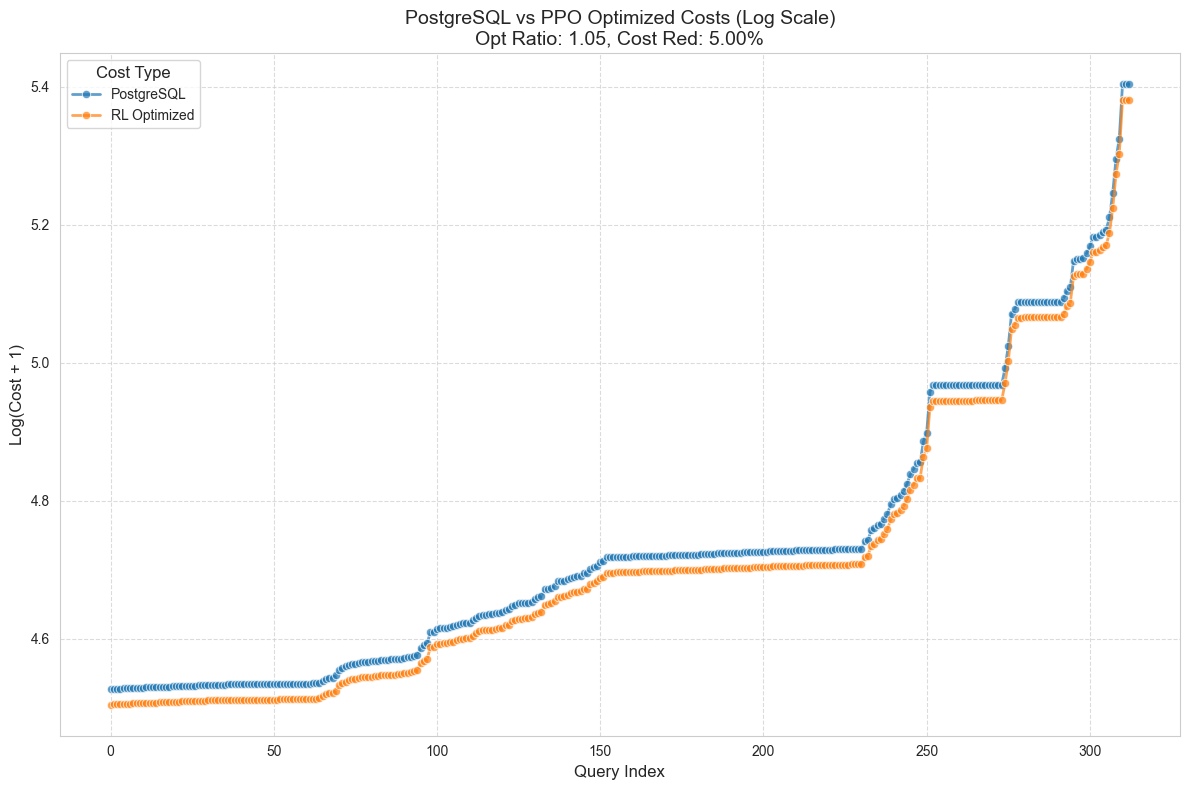

In [17]:
#ppo
from stable_baselines3 import PPO

set_seed(42)
print("Training PPO on 70% of queries...")
model = PPO("MlpPolicy", train_env, verbose=1, learning_rate=0.0001, n_steps=2048, batch_size=64,
            n_epochs=10, ent_coef=0.01, max_grad_norm=3.0, clip_range=0.1, device="cpu", seed=42)

class ValidationCallback:
    def __init__(self, val_env, eval_freq=1000):
        self.val_env = val_env
        self.eval_freq = eval_freq
        self.rewards = []
        self.best_ratio = 1.0

    def __call__(self, locals_, globals_):
        if locals_['self'].num_timesteps % self.eval_freq == 0:
            obs = self.val_env.reset()[0]
            total_reward = 0
            rl_costs = []
            pg_costs = []
            step = 0
            for _ in range(len(self.val_env.all_queries)):
                action, _ = locals_['self'].predict(obs, deterministic=True)
                obs, reward, done, _, _ = self.val_env.step(action)
                query = self.val_env.all_queries[step]
                true_cost = self.val_env.query_data.get(query, 0)
                cost_reduction = np.clip(action[0], 0.05, 0.95)
                join_preference = np.clip(action[1], 0.0, 1.0)
                predicted_cost = true_cost * (1 - cost_reduction) * (1 - 0.1 * join_preference) if true_cost > 0 else 0
                rl_costs.append(predicted_cost)
                pg_costs.append(true_cost)
                total_reward += reward[0]
                step += 1
                if done:
                    break
            avg_rl_cost = np.mean(rl_costs) if rl_costs else 0
            avg_pg_cost = np.mean(pg_costs) if pg_costs else 0
            optimization_ratio = avg_pg_cost / avg_rl_cost if avg_rl_cost > 0 else 1.0
            cost_reduction = np.mean([(pg - rl) / pg for pg, rl in zip(pg_costs, rl_costs) if pg > 0]) * 100 if pg_costs else 0
            if optimization_ratio > self.best_ratio:
                self.best_ratio = optimization_ratio
                print(f"PPO - New best Optimization Ratio: {self.best_ratio:.2f}")
            print(f"PPO - Timestep {locals_['self'].num_timesteps}: Total Reward: {total_reward:.2f}, "
                  f"Avg RL Cost: {avg_rl_cost:.2f}, Avg PG Cost: {avg_pg_cost:.2f}, "
                  f"Optimization Ratio: {optimization_ratio:.2f}, Cost Reduction: {cost_reduction:.2f}%")

model.learn(total_timesteps=200000, callback=ValidationCallback(val_env))

obs = test_env.reset()[0]
total_reward = 0
rl_costs = []
pg_costs = []
step = 0
for _ in range(len(test_queries)):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, _, _ = test_env.step(action)
    query = test_env.all_queries[step]
    true_cost = test_env.query_data.get(query, 0)
    cost_reduction = np.clip(action[0], 0.05, 0.95)
    join_preference = np.clip(action[1], 0.0, 1.0)
    predicted_cost = true_cost * (1 - cost_reduction) * (1 - 0.1 * join_preference) if true_cost > 0 else 0
    rl_costs.append(predicted_cost)
    pg_costs.append(true_cost)
    total_reward += reward[0]
    step += 1
    if done:
        break

avg_rl_cost = np.mean(rl_costs) if rl_costs else 0
avg_pg_cost = np.mean(pg_costs) if pg_costs else 0
optimization_ratio = avg_pg_cost / avg_rl_cost if avg_rl_cost > 0 else 1.0
cost_reduction = np.mean([(pg - rl) / pg for pg, rl in zip(pg_costs, rl_costs) if pg > 0]) * 100 if pg_costs else 0
print(f"PPO - Final Test - Total Reward: {total_reward:.2f}, "
      f"Avg RL Cost: {avg_rl_cost:.2f}, Avg PG Cost: {avg_pg_cost:.2f}, "
      f"Optimization Ratio: {optimization_ratio:.2f}, Cost Reduction: {cost_reduction:.2f}%")

plot_validation(pg_costs, rl_costs, optimization_ratio, cost_reduction, "PPO")

Training SAC on 70% of queries...
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
SAC - Final Test - Total Reward: 16866.28, Avg RL Cost: 30038.80, Avg PG Cost: 61205.18, Optimization Ratio: 2.04, Cost Reduction: 51.06%


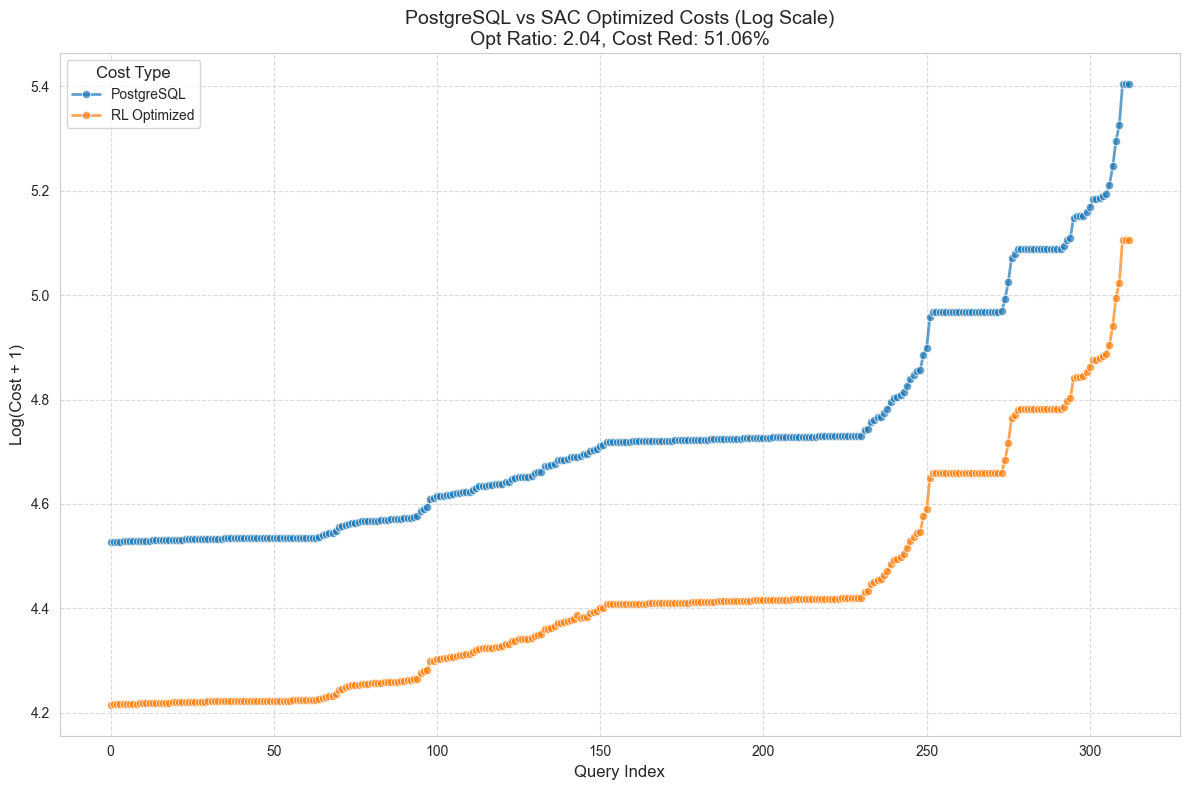

In [80]:
#sac
from stable_baselines3 import SAC

set_seed(42)
print("Training SAC on 70% of queries...")
model = SAC("MlpPolicy", train_env, verbose=1, learning_rate=0.0005, buffer_size=200000,
            batch_size=256, tau=0.005, gamma=0.99, ent_coef=0.002, device="cpu", seed=42)

class ValidationCallback:
    def __init__(self, val_env, eval_freq=1000):
        self.val_env = val_env
        self.eval_freq = eval_freq
        self.rewards = []
        self.best_ratio = 1.0

    def __call__(self, locals_, globals_):
        if locals_['self'].num_timesteps % self.eval_freq == 0:
            obs = self.val_env.reset()[0]
            total_reward = 0
            rl_costs = []
            pg_costs = []
            step = 0
            for _ in range(len(self.val_env.all_queries)):
                action, _ = locals_['self'].predict(obs, deterministic=True)
                obs, reward, done, _, _ = self.val_env.step(action)
                query = self.val_env.all_queries[step]
                true_cost = self.val_env.query_data.get(query, 0)
                cost_reduction = np.clip(action[0], 0.05, 0.95)
                join_preference = np.clip(action[1], 0.0, 1.0)
                predicted_cost = true_cost * (1 - cost_reduction) * (1 - 0.1 * join_preference) if true_cost > 0 else 0
                rl_costs.append(predicted_cost)
                pg_costs.append(true_cost)
                total_reward += reward[0]
                step += 1
                if done:
                    break
            avg_rl_cost = np.mean(rl_costs) if rl_costs else 0
            avg_pg_cost = np.mean(pg_costs) if pg_costs else 0
            optimization_ratio = avg_pg_cost / avg_rl_cost if avg_rl_cost > 0 else 1.0
            cost_reduction = np.mean([(pg - rl) / pg for pg, rl in zip(pg_costs, rl_costs) if pg > 0]) * 100 if pg_costs else 0
            if optimization_ratio > self.best_ratio:
                self.best_ratio = optimization_ratio
                print(f"SAC - New best Optimization Ratio: {self.best_ratio:.2f}")
            print(f"SAC - Timestep {locals_['self'].num_timesteps}: Total Reward: {total_reward:.2f}, "
                  f"Avg RL Cost: {avg_rl_cost:.2f}, Avg PG Cost: {avg_pg_cost:.2f}, "
                  f"Optimization Ratio: {optimization_ratio:.2f}, Cost Reduction: {cost_reduction:.2f}%")

model.learn(total_timesteps=300000, callback=ValidationCallback(val_env))

obs = test_env.reset()[0]
total_reward = 0
rl_costs = []
pg_costs = []
step = 0
for _ in range(len(test_queries)):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, _, _ = test_env.step(action)
    query = test_env.all_queries[step]
    true_cost = test_env.query_data.get(query, 0)
    cost_reduction = np.clip(action[0], 0.05, 0.95)
    join_preference = np.clip(action[1], 0.0, 1.0)
    predicted_cost = true_cost * (1 - cost_reduction) * (1 - 0.1 * join_preference) if true_cost > 0 else 0
    rl_costs.append(predicted_cost)
    pg_costs.append(true_cost)
    total_reward += reward[0]
    step += 1
    if done:
        break

avg_rl_cost = np.mean(rl_costs) if rl_costs else 0
avg_pg_cost = np.mean(pg_costs) if pg_costs else 0
optimization_ratio = avg_pg_cost / avg_rl_cost if avg_rl_cost > 0 else 1.0
cost_reduction = np.mean([(pg - rl) / pg for pg, rl in zip(pg_costs, rl_costs) if pg > 0]) * 100 if pg_costs else 0
print(f"SAC - Final Test - Total Reward: {total_reward:.2f}, "
      f"Avg RL Cost: {avg_rl_cost:.2f}, Avg PG Cost: {avg_pg_cost:.2f}, "
      f"Optimization Ratio: {optimization_ratio:.2f}, Cost Reduction: {cost_reduction:.2f}%")

plot_validation(pg_costs, rl_costs, optimization_ratio, cost_reduction, "SAC")

Training DDPG on 70% of queries...
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
DDPG - Final Test - Total Reward: 17152.56, Avg RL Cost: 29360.26, Avg PG Cost: 61205.18, Optimization Ratio: 2.08, Cost Reduction: 52.22%


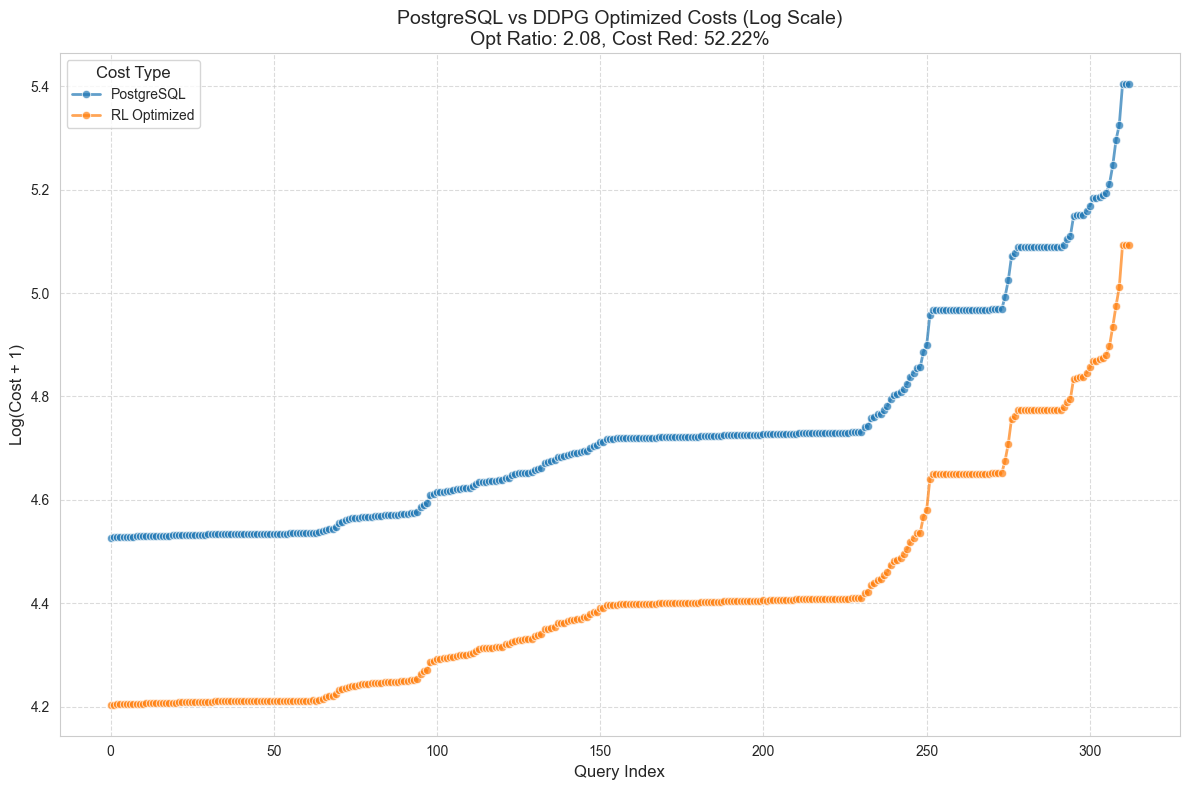

In [84]:
#ddpg
from stable_baselines3 import DDPG
from stable_baselines3.common.noise import NormalActionNoise

set_seed(42)
print("Training DDPG on 70% of queries...")
n_actions = train_env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))
model = DDPG("MlpPolicy", train_env, verbose=1, learning_rate=0.0002, buffer_size=200000,
             batch_size=256, tau=0.005, gamma=0.99, action_noise=action_noise, device="cpu", seed=42)

class ValidationCallback:
    def __init__(self, val_env, eval_freq=1000):
        self.val_env = val_env
        self.eval_freq = eval_freq
        self.rewards = []
        self.best_ratio = 1.0

    def __call__(self, locals_, globals_):
        if locals_['self'].num_timesteps % self.eval_freq == 0:
            obs = self.val_env.reset()[0]
            total_reward = 0
            rl_costs = []
            pg_costs = []
            step = 0
            for _ in range(len(self.val_env.all_queries)):
                action, _ = locals_['self'].predict(obs, deterministic=True)
                obs, reward, done, _, _ = self.val_env.step(action)
                query = self.val_env.all_queries[step]
                true_cost = self.val_env.query_data.get(query, 0)
                cost_reduction = np.clip(action[0], 0.05, 0.95)
                join_preference = np.clip(action[1], 0.0, 1.0)
                predicted_cost = true_cost * (1 - cost_reduction) * (1 - 0.1 * join_preference) if true_cost > 0 else 0
                rl_costs.append(predicted_cost)
                pg_costs.append(true_cost)
                total_reward += reward[0]
                step += 1
                if done:
                    break
            avg_rl_cost = np.mean(rl_costs) if rl_costs else 0
            avg_pg_cost = np.mean(pg_costs) if pg_costs else 0
            optimization_ratio = avg_pg_cost / avg_rl_cost if avg_rl_cost > 0 else 1.0
            cost_reduction = np.mean([(pg - rl) / pg for pg, rl in zip(pg_costs, rl_costs) if pg > 0]) * 100 if pg_costs else 0
            if optimization_ratio > self.best_ratio:
                self.best_ratio = optimization_ratio
                print(f"DDPG - New best Optimization Ratio: {self.best_ratio:.2f}")
            print(f"DDPG - Timestep {locals_['self'].num_timesteps}: Total Reward: {total_reward:.2f}, "
                  f"Avg RL Cost: {avg_rl_cost:.2f}, Avg PG Cost: {avg_pg_cost:.2f}, "
                  f"Optimization Ratio: {optimization_ratio:.2f}, Cost Reduction: {cost_reduction:.2f}%")

model.learn(total_timesteps=300000, callback=ValidationCallback(val_env))

obs = test_env.reset()[0]
total_reward = 0
rl_costs = []
pg_costs = []
step = 0
for _ in range(len(test_queries)):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, _, _ = test_env.step(action)
    query = test_env.all_queries[step]
    true_cost = test_env.query_data.get(query, 0)
    cost_reduction = np.clip(action[0], 0.05, 0.95)
    join_preference = np.clip(action[1], 0.0, 1.0)
    predicted_cost = true_cost * (1 - cost_reduction) * (1 - 0.1 * join_preference) if true_cost > 0 else 0
    rl_costs.append(predicted_cost)
    pg_costs.append(true_cost)
    total_reward += reward[0]
    step += 1
    if done:
        break

avg_rl_cost = np.mean(rl_costs) if rl_costs else 0
avg_pg_cost = np.mean(pg_costs) if pg_costs else 0
optimization_ratio = avg_pg_cost / avg_rl_cost if avg_rl_cost > 0 else 1.0
cost_reduction = np.mean([(pg - rl) / pg for pg, rl in zip(pg_costs, rl_costs) if pg > 0]) * 100 if pg_costs else 0
print(f"DDPG - Final Test - Total Reward: {total_reward:.2f}, "
      f"Avg RL Cost: {avg_rl_cost:.2f}, Avg PG Cost: {avg_pg_cost:.2f}, "
      f"Optimization Ratio: {optimization_ratio:.2f}, Cost Reduction: {cost_reduction:.2f}%")

plot_validation(pg_costs, rl_costs, optimization_ratio, cost_reduction, "DDPG")